In [5]:
import json
import os
import cv2
import requests
import sys

LIMIT_PX = 1024
LIMIT_BYTE = 1024*1024  # 1MB
LIMIT_BOX = 40



def kakao_ocr_resize(image_path: str):
    """
    ocr detect/recognize api helper
    ocr api의 제약사항이 넘어서는 이미지는 요청 이전에 전처리가 필요.

    pixel 제약사항 초과: resize
    용량 제약사항 초과  : 다른 포맷으로 압이미지 분할 등의 처리 필요. (예제에서 제공하지 않음)

    :param image_path: 이미지파일 경로
    :return:
    """
    image = cv2.imread(image_path)
    print(image)
    
    height, width, _ = image.shape

    if LIMIT_PX < height or LIMIT_PX < width:
        ratio = float(LIMIT_PX) / max(height, width)
        image = cv2.resize(image, None, fx=ratio, fy=ratio)
        height, width, _ = height, width, _ = image.shape

        # api 사용전에 이미지가 resize된 경우, recognize시 resize된 결과를 사용해야함.
        image_path = "{}_resized.jpg".format(image_path)
        cv2.imwrite(image_path, image)

        return image_path
    return None


def kakao_ocr(image_path: str, appkey: str):
    """
    OCR api request example
    :param image_path: 이미지파일 경로
    :param appkey: 카카오 앱 REST API 키
    """
    API_URL = 'https://dapi.kakao.com/v2/vision/text/ocr'

    headers = {'Authorization': 'KakaoAK {}'.format(appkey)}

    image = cv2.imread(image_path)
    jpeg_image = cv2.imencode(".jpg", image)[1]
    data = jpeg_image.tobytes()


    return requests.post(API_URL, headers=headers, files={"image": data})


def main():
    
    image_path= "./image/giftcon.jpg"
    appkey= "3b146a165b5747f2a9731e9caabec470"
    resize_impath = kakao_ocr_resize(image_path)
    if resize_impath is not None:
        image_path = resize_impath
        print("원본 대신 리사이즈된 이미지를 사용합니다.")

    output = kakao_ocr(image_path, appkey).json()
    print("[OCR] output:\n{}\n".format(json.dumps(output, sort_keys=True, indent=2)))


if __name__ == "__main__":
    main()

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
원본 대신 리사이즈된 이미지를 사용합니다.
[OCR] output:
{
  "result": [
    {
      "boxes": [
        [
          50,
          315
        ],
        [
          131,
          315
        ],
        [
          131,
          331
        ],
        [
          50,
          331
        ]
      ],
      "recognition_words": [
        "Send Bee"
      ]
    },
    {
      "boxes": [
        [
          110,
          560
        ],
        [
          180,
          560
        ],
        [
          180,
          574
        ],
        [
          110,
          574
        ]
      ],
      "re

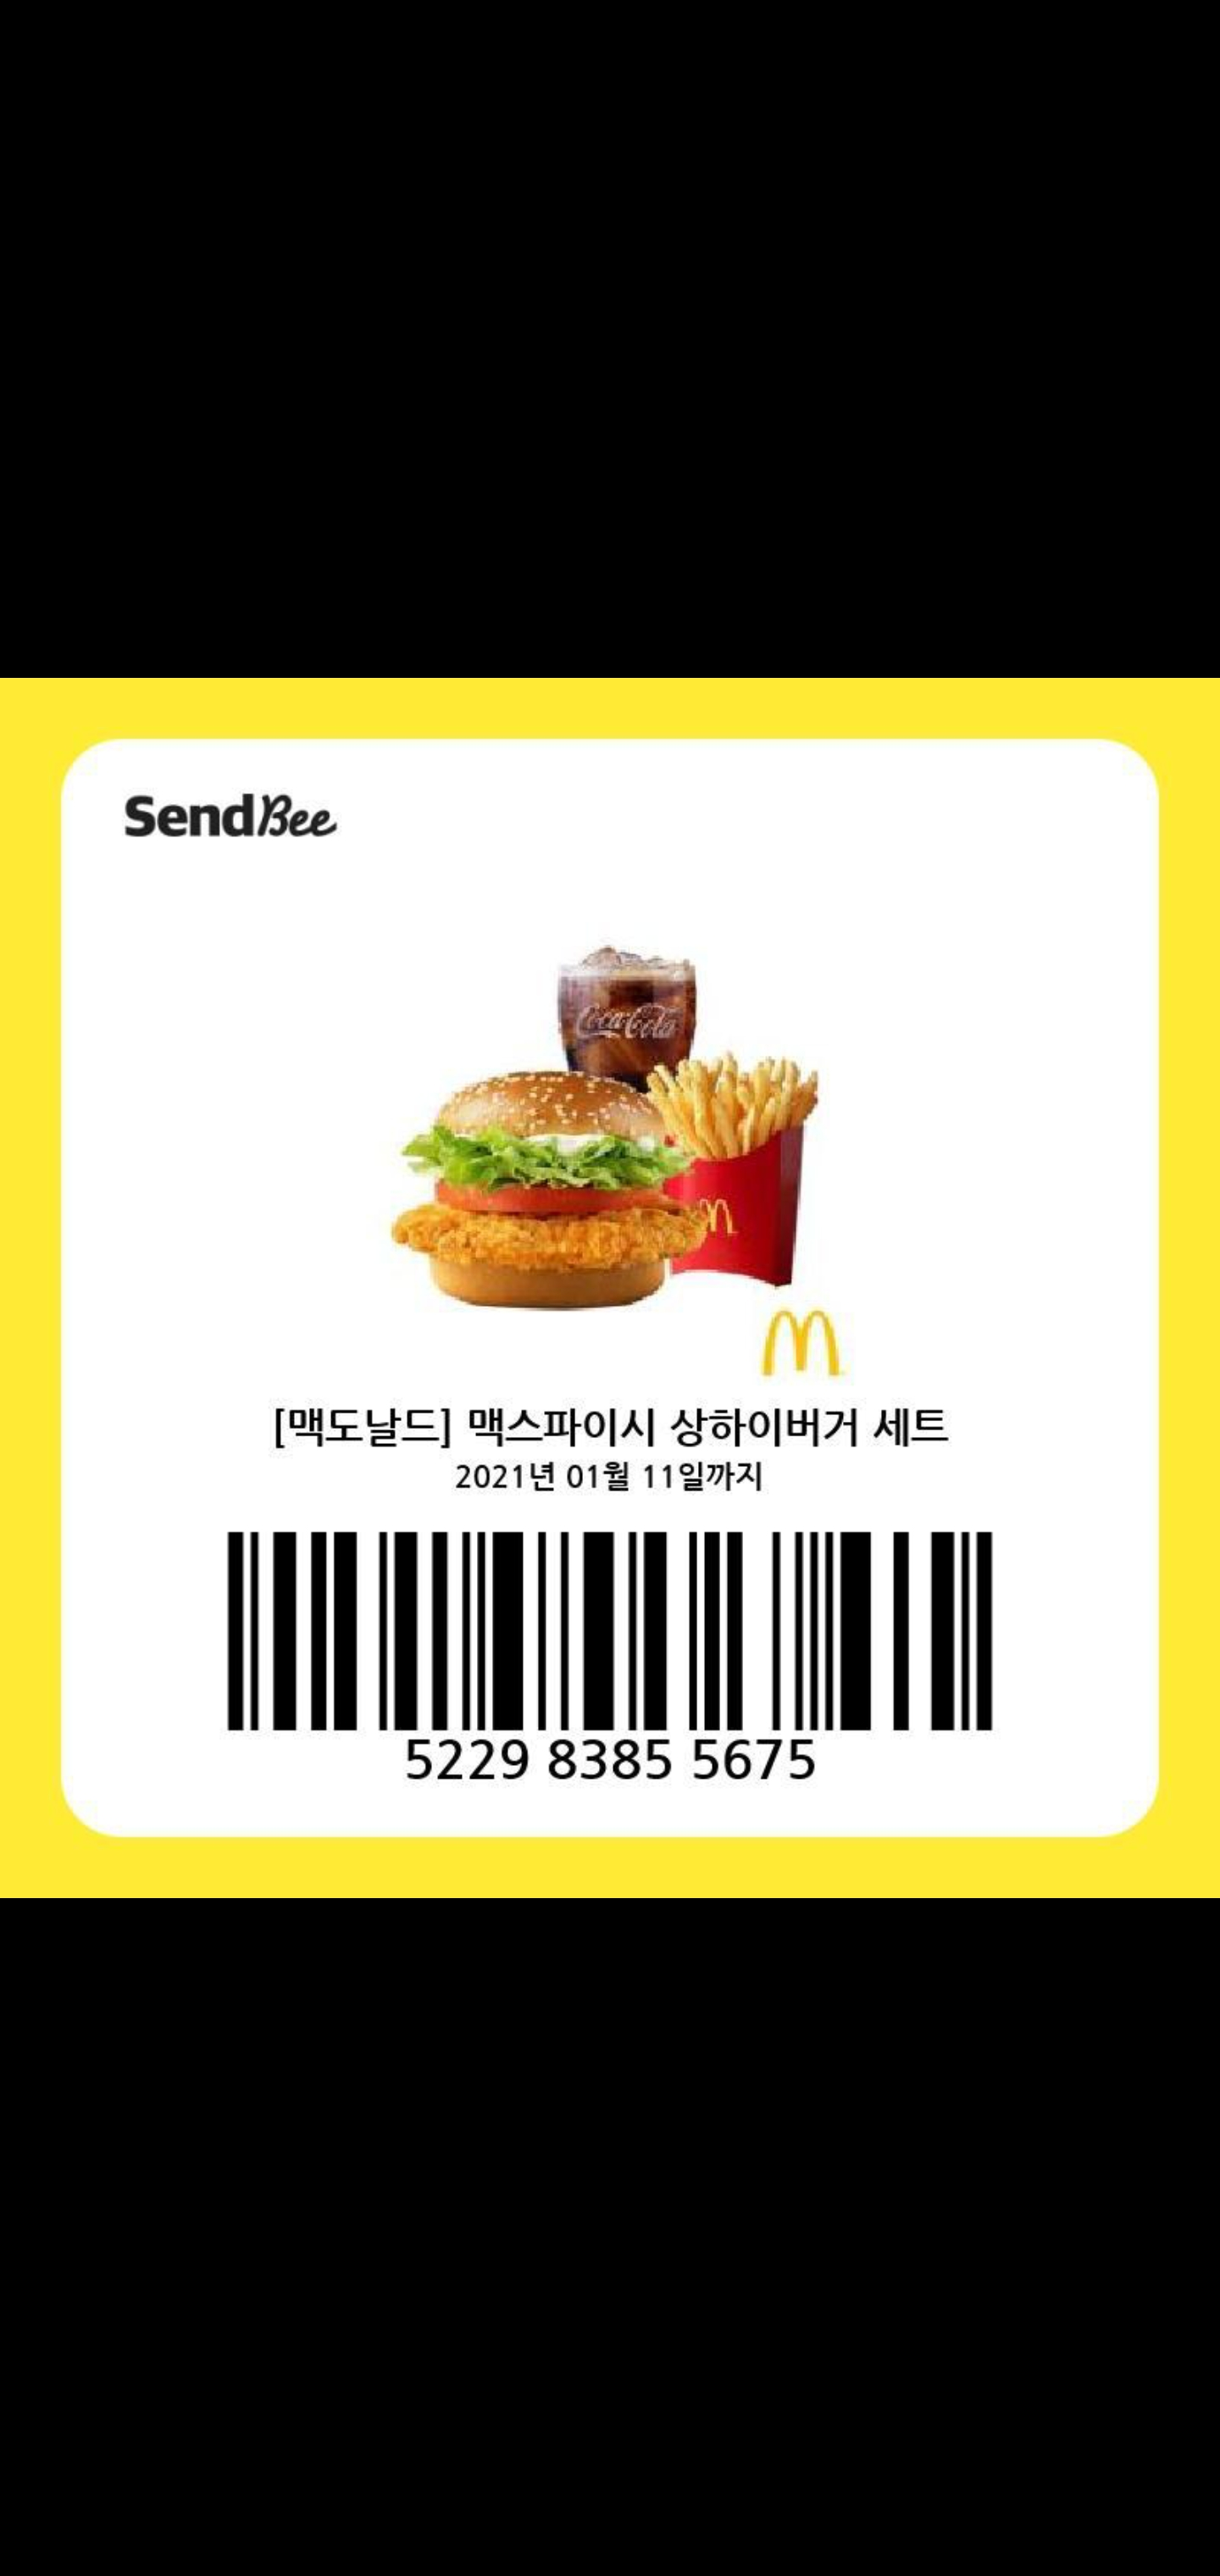

In [17]:
from IPython.display import Image

Image("C:/Users/Administrator/Desktop/image/giftcon.jpg")


In [7]:
import pytesseract


print(pytesseract.image_to_string('./image/giftcon.jpg', lang='kor'))

52007

[맥도날드] 맥스파이시 상하이버거 세트
2021년 01월 11일까지

5229 8385 5675

 



In [3]:
from tkinter import * 
from tkinter import filedialog    
from tkinter import messagebox   
from IPython.display import Image
import pytesseract
import cv2
root = Tk()


##function


def about():
    messagebox.showinfo("about","파일을 업로드 하시면 해당 이미지의 문자를 찾아보여줍니다!")

def upload():
    filename = filedialog.askopenfilename(initialdir="/", title="Select file",
                                          filetypes=(("jpg files", "*.jpg"),
                                          ("all files", "*.*")))
    image = cv2.imread(filename, cv2.IMREAD_REDUCED_GRAYSCALE_8)
    cv2.imshow("result", image)
    cv2.waitKey()
    cv2.destroyAllWindows()
    
    print(filename)
    result=pytesseract.image_to_string(filename, lang='kor')
    print(result)
    
## program info
root.title ("OCR TEST")
root.geometry("540x380") 

##label

label1 = Label (root, text= "원하는 이미지를 업로드 해주세요!")
label1.pack()


## button 
btn1= Button(root,text="파일 업로드",command=upload)

btn1.pack(side="bottom",anchor="w")



##Manu

menubar = Menu(root)  
helpmenu = Menu(menubar, tearoff=0)
menubar.add_cascade(label="Help", menu=helpmenu)
helpmenu.add_command(label="About...", command=about)

root.config(menu=menubar)             # 생성된 객체를 위에서 생성된 메뉴바에 연결   


##exec
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-3-de7b9fc195b2>", line 21, in upload
    cv2.imshow("result", image)
cv2.error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'



C:/Users/Administrator/Desktop/test.jpg
으여 0223 22

 

C:/Users/Administrator/Desktop/done.JPG
6「ㄷ620660 105680066 1-06061299667661279+
5000255『411) 29960 10568066
32691660326166-1ㄷ602180×:~/90/5『ㅇ/91타06.000/004600010006/90-62656/662._665오6

 

C:/Users/Administrator/Desktop/Avatar_jay.jpg
 



Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-3-de7b9fc195b2>", line 21, in upload
    cv2.imshow("result", image)
cv2.error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'



In [51]:
from tkinter import * 
from tkinter import filedialog    
from tkinter import messagebox   
from IPython.display import Image
import pytesseract
import cv2
root = Tk()


##exec run func

def run():
    print(txt.get("1.0",END))
    print(ent.get())
    
def domenu():
    messagebox.showinfo("about","파일을 업로드 하시면 해당 이미지의 문자를 찾아보여줍니다!")

def upload():
    filename = filedialog.askopenfilename(initialdir="/", title="Select file",
                                          filetypes=(("jpg files", "*.jpg"),
                                          ("all files", "*.*")))
    
    print(filename)
    print(pytesseract.image_to_string(filename, lang='kor'))
    img=PhotoImage(file=filename, master=root)
    img.show()
    btn5 = Button(root,image=img)
    btn5.pack()

## program info
root.title ("OCR TEST")
root.geometry("1980x500") 

##label

label1 = Label (root, text= "원하는 이미지를 업로드 해주세요!")
label1.pack()
## button 
btn1= Button(root,text="파일 업로드",command=upload)
btn1.pack(side="bottom",anchor="w")




##Manu

menubar = Menu(root)  
helpmenu = Menu(menubar, tearoff=0)
menubar.add_cascade(label="Help", menu=helpmenu)
helpmenu.add_command(label="About...", command=domenu)

root.config(menu=menubar)             # 생성된 객체를 위에서 생성된 메뉴바에 연결   
##exec
root.mainloop()

C:/Users/Administrator/Desktop/캡처.PNG
'56007966

 

[맥도날드] 맥스파이시 상하이버거 세트

2021년 01월 11일까지

5229 8385 5675

 

 

 

 

 

 

 

 

 

 

 

 



Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-51-c2f892f3db90>", line 27, in upload
    img.show()
AttributeError: 'PhotoImage' object has no attribute 'show'


In [42]:
from PIL import Image


img="C:/Users/Administrator/Desktop/image/giftcon.jpg_resized.jpg"
    
    
image = Image.open(img)